In [10]:
import numpy as np
import import_ipynb
import ManageData
import BERT
import transformers
import matplotlib.pyplot as plt
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer
from transformers import TFBertModel
from sklearn.model_selection import train_test_split

In [2]:
X = ManageData.X
y = ManageData.y

In [3]:
bertTokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length):
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = bertTokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

In [4]:
train_input_ids, train_attention_masks = bert_encode(X,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\tausi\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2285: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [5]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [6]:
model_bert = BERT.create_model(bert_model)
model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

In [7]:
history_bert = model_bert.fit(
    [train_input_ids, train_attention_masks],
    y,
    validation_split=0.25,
    epochs=10,
    batch_size=32
)

Epoch 1/10
46/46 [==============================] - 221s 5s/step - loss: 0.4911 - accuracy: 0.7641 - val_loss: 0.1497 - val_accuracy: 0.9427
Epoch 2/10
46/46 [==============================] - 208s 5s/step - loss: 0.2268 - accuracy: 0.9107 - val_loss: 0.2487 - val_accuracy: 0.9509
Epoch 3/10
46/46 [==============================] - 208s 5s/step - loss: 0.1890 - accuracy: 0.9243 - val_loss: 0.1680 - val_accuracy: 0.9427
Epoch 4/10
46/46 [==============================] - 206s 4s/step - loss: 0.0967 - accuracy: 0.9700 - val_loss: 0.2306 - val_accuracy: 0.9509
Epoch 5/10
46/46 [==============================] - 208s 5s/step - loss: 0.1178 - accuracy: 0.9530 - val_loss: 0.1489 - val_accuracy: 0.9468
Epoch 6/10
46/46 [==============================] - 207s 5s/step - loss: 0.0996 - accuracy: 0.9639 - val_loss: 0.2530 - val_accuracy: 0.9427
Epoch 7/10
46/46 [==============================] - 207s 5s/step - loss: 0.0825 - accuracy: 0.9775 - val_loss: 0.3515 - val_accuracy: 0.9162
Epoch 8/10
46

In [8]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

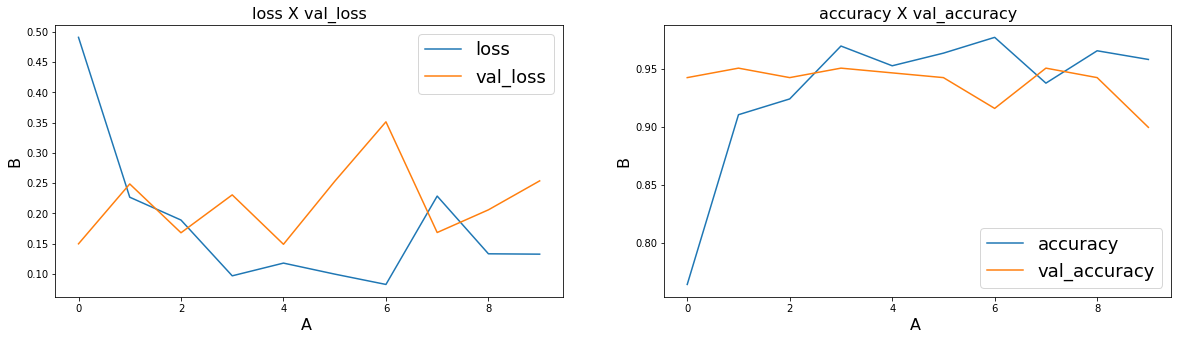

In [11]:
plot_learning_curves(history_bert, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])